In [3]:
import sys

parentdir = "/Users/max/Desktop/Dissertation/implementations/Disso-COLD"

sys.path.append(parentdir + "/functions")

In [4]:
from utils import AssessData
from datasets import load_dataset

/Users/max/Desktop/Dissertation/implementations/Disso-COLD/proj_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
def _indexing(alist):
  id = 0; indexed = {}
  for x in alist:
    for y in x:
      id +=1
      indexed[id] = y
  return indexed

HYPERPARTISAN DATASET

In [41]:
hyperpartisan_dataset = load_dataset("hyperpartisan_news_detection", "bypublisher", "/data") #Not stripped of headers and footers
hyperpartisan_dataset.keys()

Using custom data configuration bypublisher-data_dir=%2Fdata
Reusing dataset hyperpartisan_news_detection (/Users/max/.cache/huggingface/datasets/hyperpartisan_news_detection/bypublisher-data_dir=%2Fdata/1.0.0/7f4215b0474950ddf516e806400ab81d098b3da3b3a919a13cd1a4cf2c677012)
100%|██████████| 2/2 [00:00<00:00, 21.68it/s]


dict_keys(['train', 'validation'])

In [42]:
seed = 32

In [43]:
hyperpartisan_train = hyperpartisan_dataset['train']
hyperpartisan_valid = hyperpartisan_dataset['validation']

hyperpartisan_train = hyperpartisan_train.shuffle(seed = seed)
hyperpartisan_valid = hyperpartisan_valid.shuffle(seed = seed)

Loading cached shuffled indices for dataset at /Users/max/.cache/huggingface/datasets/hyperpartisan_news_detection/bypublisher-data_dir=%2Fdata/1.0.0/7f4215b0474950ddf516e806400ab81d098b3da3b3a919a13cd1a4cf2c677012/cache-fd41281fa7a8783e.arrow
Loading cached shuffled indices for dataset at /Users/max/.cache/huggingface/datasets/hyperpartisan_news_detection/bypublisher-data_dir=%2Fdata/1.0.0/7f4215b0474950ddf516e806400ab81d098b3da3b3a919a13cd1a4cf2c677012/cache-ef73cd395e00d405.arrow


Text(0, 0.5, 'Count')

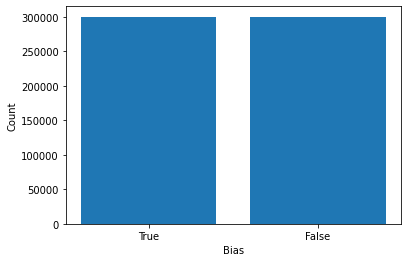

In [44]:
import seaborn as sns
from nltk import FreqDist
import matplotlib.pyplot as plt

#TRAIN

distribution = FreqDist(hyperpartisan_train['hyperpartisan'])
plt.bar(["True", "False"], distribution.values())
plt.xlabel("Bias")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

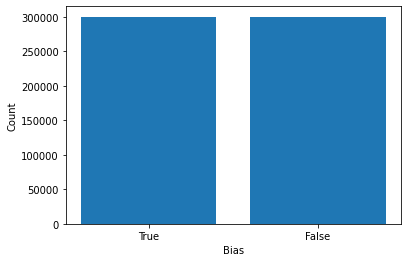

In [45]:
#TEST

test_distribution = FreqDist(hyperpartisan_valid['hyperpartisan'])
plt.bar(["True", "False"], test_distribution.values())
plt.xlabel("Bias")
plt.ylabel("Count")

In [46]:
#SELECT ONLY 2000 documents 

hyperpartisan_frac = hyperpartisan_train.select(range(2000))

In [47]:
FreqDist(hyperpartisan_frac['hyperpartisan'])

FreqDist({True: 1012, False: 988})

In [48]:
distribution

FreqDist({True: 300000, False: 300000})

In [50]:
adict = {}

In [51]:
func_train = AssessData(hyperpartisan_train['text'], adict)
func_test = AssessData(hyperpartisan_valid['text'], adict)

In [53]:
func_train._get_string_length()

AttributeError: 'list' object has no attribute 'items'

In [ ]:
func_test._get_string_length()

{0: 786,
 1: 3138,
 2: 2287,
 3: 1253,
 4: 281,
 5: 97,
 6: 2474,
 7: 632,
 8: 469,
 9: 990,
 10: 552,
 11: 206,
 12: 240,
 13: 1401,
 14: 1014,
 15: 829,
 16: 514,
 17: 1252,
 18: 858,
 19: 1045,
 20: 2576,
 21: 741,
 22: 724,
 23: 2726,
 24: 180,
 25: 1220,
 26: 338,
 27: 873,
 28: 126,
 29: 481,
 30: 493,
 31: 693,
 32: 250,
 33: 579,
 34: 303,
 35: 181,
 36: 546,
 37: 498,
 38: 1543,
 39: 221,
 40: 992,
 41: 2158,
 42: 1618,
 43: 140,
 44: 1565,
 45: 228,
 46: 1650,
 47: 321,
 48: 760,
 49: 931,
 50: 568,
 51: 338,
 52: 509,
 53: 396,
 54: 1664,
 55: 1296,
 56: 1393,
 57: 647,
 58: 1192,
 59: 139,
 60: 4160,
 61: 806,
 62: 216,
 63: 1287,
 64: 1196,
 65: 141,
 66: 1351,
 67: 1402,
 68: 481,
 69: 252,
 70: 322,
 71: 953,
 72: 102,
 73: 1158,
 74: 120,
 75: 509,
 76: 643,
 77: 439,
 78: 569,
 79: 556,
 80: 494,
 81: 406,
 82: 1132,
 83: 590,
 84: 195,
 85: 390,
 86: 4107,
 87: 268,
 88: 2579,
 89: 3470,
 90: 452,
 91: 2809,
 92: 1162,
 93: 992,
 94: 1078,
 95: 728,
 96: 1909,
 97: 14

{'Too Long': 11154, 'Long': 370756, 'BERT': 112082, 'Short': 106008}


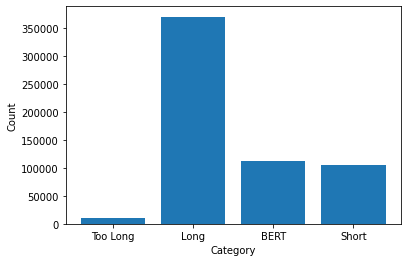

{'Too Long': 11154, 'Long': 370756, 'BERT': 112082, 'Short': 106008}


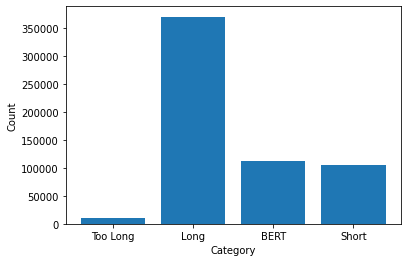

(None, None)

In [ ]:
func_train._create_distribution(), func_test._create_distribution()
func_train._visualise(), func_test._visualise()

In [ ]:
distribution = func_train._distribution

hyperpartisan_distribution = {"seed": seed,
                            "train": func_train._distribution,
                            "test": func_test._distribution}

In [ ]:
import json

with open("hyperpartisan_distribution", 'w') as out:
    json.dump(hyperpartisan_distribution, out )

In [ ]:
func_test._chunk(300)
func_train._chunk(300)

In [ ]:
dict_count = {i: len(x) for i,x in func_train._chunks.items()}
dict_count

{0: 2,
 1: 10,
 2: 7,
 3: 4,
 4: 1,
 5: 1,
 6: 8,
 7: 2,
 8: 1,
 9: 3,
 10: 1,
 11: 1,
 12: 1,
 13: 4,
 14: 3,
 15: 2,
 16: 1,
 17: 4,
 18: 2,
 19: 3,
 20: 8,
 21: 2,
 22: 2,
 23: 9,
 24: 1,
 25: 4,
 26: 1,
 27: 2,
 28: 1,
 29: 1,
 30: 1,
 31: 2,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 5,
 39: 1,
 40: 3,
 41: 7,
 42: 5,
 43: 1,
 44: 5,
 45: 1,
 46: 5,
 47: 1,
 48: 2,
 49: 3,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 5,
 55: 4,
 56: 4,
 57: 2,
 58: 3,
 59: 1,
 60: 13,
 61: 2,
 62: 1,
 63: 4,
 64: 3,
 65: 1,
 66: 4,
 67: 4,
 68: 1,
 69: 1,
 70: 1,
 71: 3,
 72: 1,
 73: 3,
 74: 1,
 75: 1,
 76: 2,
 77: 1,
 78: 1,
 79: 1,
 80: 1,
 81: 1,
 82: 3,
 83: 1,
 84: 1,
 85: 1,
 86: 13,
 87: 1,
 88: 8,
 89: 11,
 90: 1,
 91: 9,
 92: 3,
 93: 3,
 94: 3,
 95: 2,
 96: 6,
 97: 1,
 98: 10,
 99: 3,
 100: 4,
 101: 2,
 102: 4,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 5,
 108: 5,
 109: 2,
 110: 3,
 111: 5,
 112: 1,
 113: 3,
 114: 9,
 115: 2,
 116: 2,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 27,
 122: 

20 NEWSGROUP

In [18]:
dataset_dir = "/Users/max/Desktop/Dissertation/implementations/Disso-COLD/Datasets"

train =dataset_dir+"/20news-bydate"+"/20news-bydate-train"
test = dataset_dir+"/20news-bydate"+ "/20news-bydate-train"

In [19]:
from utils import PrepareCorpus,AssessData
from sklearn.model_selection import train_test_split
from datasets import Dataset,load_dataset

In [20]:
news_group_train = PrepareCorpus(train)
news_group_test = PrepareCorpus(test)

In [21]:
news_group_train_corpus = news_group_train._prep()
news_group_test_corpus = news_group_test._prep()

train_list_of_strings = _indexing(news_group_train_corpus.values())
test_list_of_strings = _indexing(news_group_test_corpus.values())

In [22]:
#Assess train and test data

train_twenty_newsgroup = AssessData(train_list_of_strings, news_group_train)
test_twenty_newsgroup = AssessData(test_list_of_strings, news_group_test)

{'Too Long': 82, 'Long': 1644, 'BERT': 2542, 'Short': 7046}


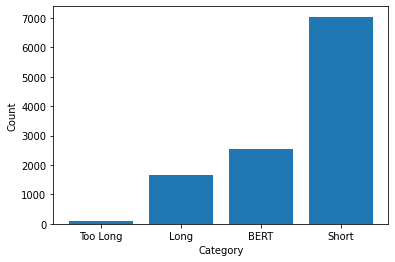

{'Too Long': 82, 'Long': 1644, 'BERT': 2542, 'Short': 7046}


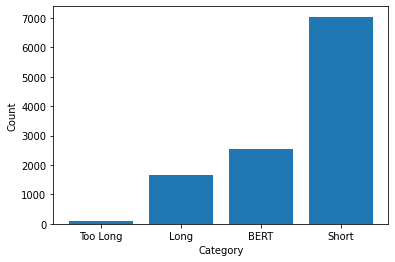

In [23]:
train_twenty_newsgroup._create_distribution()
train_twenty_newsgroup._visualise()

test_twenty_newsgroup._create_distribution()
test_twenty_newsgroup._visualise()

In [24]:
train_count = {i:len(x) for i,x in news_group_train_corpus.items()}
test_count = {i:len(x) for i,x in news_group_test_corpus.items()}

In [ ]:
train_count = {i:len(x) for i,x in news_group_train_corpus.items()}
test_count = {i:len(x) for i,x in news_group_test_corpus.items()}

In [80]:
keys = list(train_count.keys())
keys

['talk.politics.mideast',
 'rec.autos',
 'comp.sys.mac.hardware',
 'alt.atheism',
 'rec.sport.baseball',
 'comp.os.ms-windows.misc',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.med',
 'talk.politics.misc',
 'rec.motorcycles',
 'comp.windows.x',
 'comp.graphics',
 'comp.sys.ibm.pc.hardware',
 'sci.electronics',
 'talk.politics.guns',
 'sci.space',
 'soc.religion.christian',
 'misc.forsale',
 'talk.religion.misc']

Text(0, 0.5, 'categories')

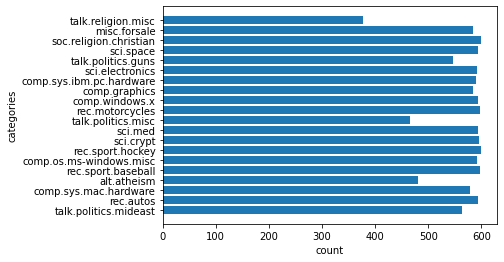

In [88]:
plt.barh(['talk.politics.mideast',
 'rec.autos',
 'comp.sys.mac.hardware',
 'alt.atheism',
 'rec.sport.baseball',
 'comp.os.ms-windows.misc',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.med',
 'talk.politics.misc',
 'rec.motorcycles',
 'comp.windows.x',
 'comp.graphics',
 'comp.sys.ibm.pc.hardware',
 'sci.electronics',
 'talk.politics.guns',
 'sci.space',
 'soc.religion.christian',
 'misc.forsale',
 'talk.religion.misc'], train_count.values())

plt.xlabel("count")
plt.ylabel("categories")

Text(0, 0.5, 'categories')

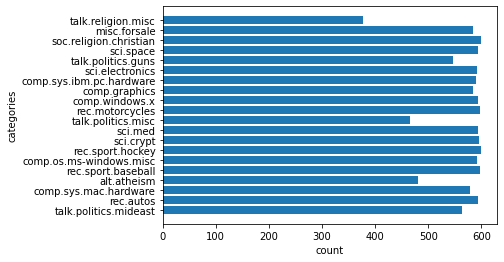

In [87]:
plt.barh(['talk.politics.mideast',
 'rec.autos',
 'comp.sys.mac.hardware',
 'alt.atheism',
 'rec.sport.baseball',
 'comp.os.ms-windows.misc',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.med',
 'talk.politics.misc',
 'rec.motorcycles',
 'comp.windows.x',
 'comp.graphics',
 'comp.sys.ibm.pc.hardware',
 'sci.electronics',
 'talk.politics.guns',
 'sci.space',
 'soc.religion.christian',
 'misc.forsale',
 'talk.religion.misc'], test_count.values())

plt.xlabel("count")
plt.ylabel("categories")

In [ ]:
train_twenty_newsgroup._chunk(300, overlap = 50)

In [ ]:
twenty_train = {i:len(x) for i,x in train_twenty_newsgroup._chunks.items()}
twenty_train

In [21]:
train_twenty_newsgroup._all_length.get(7)

384

IMDB

In [6]:
imdb = load_dataset("imdb")

Reusing dataset imdb (/Users/max/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)
100%|██████████| 3/3 [00:00<00:00, 162.30it/s]


In [7]:
imdb

#0 corresponds to negative review while 1 corresponds to positive reviews
label2text = {0:'negative', 1: 'positive'}

In [8]:
train_imdb = imdb['train']
test_imdb = imdb['test']

In [9]:
set(train_imdb['label'])

{0, 1}

In [10]:
imdb_train_text = {i:x for i,x in enumerate(train_imdb['text'])}
imdb_test_text = {i:x for i,x in enumerate(test_imdb['text'])}

imdb_train_labels = {i:x for i,x in enumerate(train_imdb['label'])}
imdb_test_labels = {i:x for i,x in enumerate(test_imdb['label'])}

In [11]:
train_imdb_assess = AssessData(imdb_train_text, dict())
test_imdb_assess = AssessData(imdb_test_text, dict())

{'Too Long': 0, 'Long': 3012, 'BERT': 4759, 'Short': 17229}


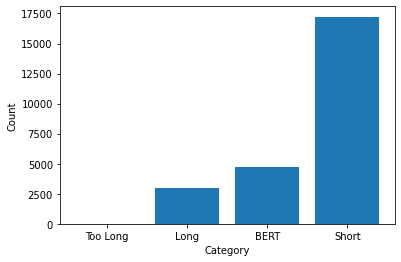

{'Too Long': 0, 'Long': 2803, 'BERT': 4639, 'Short': 17558}


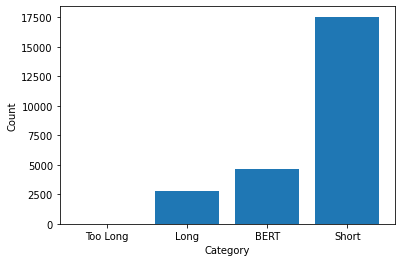

In [8]:
train_imdb_assess._create_distribution()
train_imdb_assess._visualise()

test_imdb_assess._create_distribution()
test_imdb_assess._visualise()

LONG DOCUMENTS

In [17]:
long_index = train_imdb_assess._distribution['Long']

In [15]:
#long_doc = [train_imdb_assess._content[index] for index in long_index]
train_doc_labels = [label2text[imdb_train_labels[index]] for index in list(train_imdb_assess._content.keys())]
test_doc_labels = [label2text[imdb_train_labels[index]] for index in list(train_imdb_assess._content.keys())]

<AxesSubplot:ylabel='Count'>

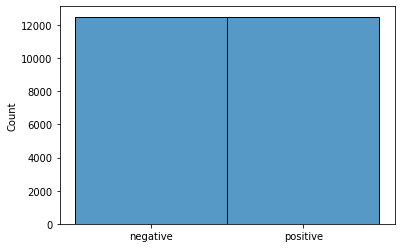

In [16]:
sns.histplot(test_doc_labels)

<AxesSubplot:ylabel='Count'>

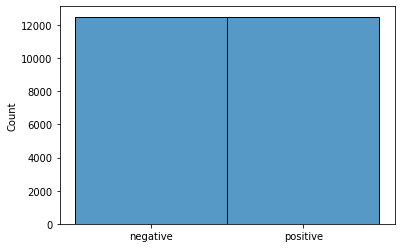

In [17]:
import seaborn as sns

sns.histplot(train_doc_labels)

In [ ]:
#Use cross_validation on test_data to tune model parameters